In [1]:
import torchvision
train_cifar_dataset = torchvision.datasets.CIFAR10('../data')
test_cifar_dataset = torchvision.datasets.CIFAR10('../data', train=False)

In [2]:
import numpy as np
def getData(dataset):
    data = []
    labels = []
    for img, label in dataset:
        data.append(np.array(img))
        labels.append(label)
    return np.transpose(np.array(data), (0, 3, 1, 2)), labels

train_data, train_labels = getData(train_cifar_dataset)
test_data, test_labels = getData(test_cifar_dataset)

In [3]:
train_data.shape, len(train_labels), test_data.shape, len(test_labels)

((50000, 3, 32, 32), 50000, (10000, 3, 32, 32), 10000)

(-0.5, 319.5, 319.5, -0.5)

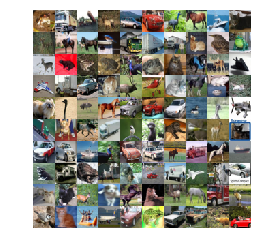

In [6]:
import torch
import matplotlib.pyplot as plt
show_img = torchvision.utils.make_grid(torch.from_numpy(train_data[:100]), nrow=10, padding=0).numpy()
# show_img.shape
plt.imshow(show_img.transpose((1, 2, 0)))
plt.axis('off')
# plt.show()

#### L1 (Manhattan) distance

$$d _ { 1 } \left( I _ { 1 } , I _ { 2 } \right) = \sum _ { p } \left| I _ { 1 } ^ { p } - I _ { 2 } ^ { p } \right|$$

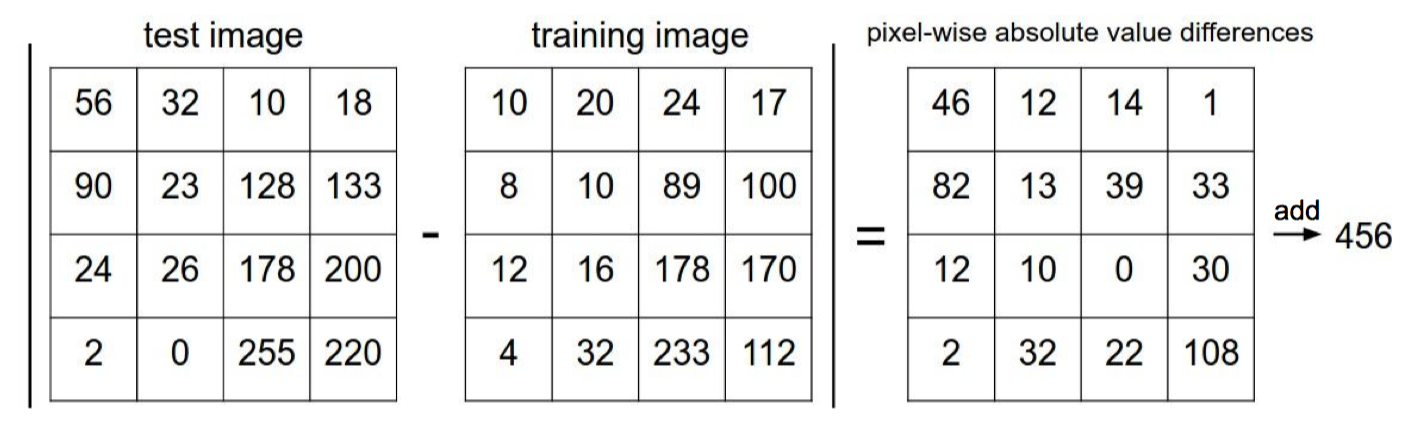

L1 距离计算两个矩阵的差，取绝对值之后求所有元素的和。

In [22]:
test_img = test_data[0]
train_img = train_data[1]
np.sum(np.abs(test_img - train_img))

411767

Nearest Neighbor classifier（最邻近分类器）只是简单的计算测试图片和每一张训练样本之间的距离，然后选出和测试样本距离最小的训练样本的标签作为输出。

In [23]:
np.argmin(np.sum(np.abs(train_data-test_img), axis=(1, 2, 3)))

26608

In [27]:
train_labels[26608]

8

In [28]:
test_labels[0]

3

最邻近并不准确。

#### L2 (Euclidean) distance

$$d _ { 2 } \left( I _ { 1 } , I _ { 2 } \right) = \sqrt { \sum _ { p } \left( I _ { 1 } ^ { p } - I _ { 2 } ^ { p } \right) ^ { 2 } }$$

欧氏距离直接相应位置相减后平方再取根号。在最邻近上表现一样。

但是 L1 更依赖于坐标，L2 不受坐标影响。